## Non-rigid Registration
Updated - 16 Nov. 2020

Run non-rigid registration with the rest of the channels and plot a comparison.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

from mpleximreg import registration, viz
from pandas import concat, read_csv

In [3]:
# path parameters
# unregistered data directories
brca_raw_dir = '/data/brca_unregistered_tifs'
hcc1143_raw_dir = '/data/hcc1143_unregistered_tifs'
tonsil_raw_dir = '/data/tonsil_unregistered_tifs'

# registered data directories - for saving registered images
brca_nonrigidreg_dirs = []
hcc1143_nonrigidreg_dirs = []
tonsil_nonrigidreg_dirs = []

for i in range(3,6):
    brca_nonrigidreg_dirs.append(f'/data/brca_nonrigidreg_ch{i}_tifs')
    hcc1143_nonrigidreg_dirs.append(f'/data/hcc1143_nonrigidreg_ch{i}_tifs')
    tonsil_nonrigidreg_dirs.append(f'/data/tonsil_nonrigidreg_ch{i}_dir')

# directory with the text file for performing SimpleElastix non-rigid registration
txt_file_dir = '../simpleITK_nonrigidreg_files/'

In [11]:
for idx, i in enumerate(range(3,6)):
    print(f'Using nonrigid registration with channel {i} on all three datasets....')
    print('\tBRCA dataset:')
    registration.nonrigid_transform_dir(brca_raw_dir, brca_nonrigidreg_dirs[idx], txt_file_dir, target_round=1, reg_channel=i)
    registration.tre_dir(brca_nonrigidreg_dirs[idx], i, method=f'Nonrigid Registration - channel {i}', dataset='BRCA (OHSU)',
                         save_path=f'../Data_Files/BRCA_nonrigid_ch{i}_results.csv')
    
#     print('\tHCC1143 dataset:')
#     registration.nonrigid_transform_dir(hcc1143_raw_dir, hcc1143_nonrigidreg_dirs[idx], txt_file_dir, target_round=1, reg_channel=i)
#     registration.tre_dir(hcc1143_nonrigidreg_dirs[idx], i, method=f'Nonrigid Registration - channel {i}', dataset='HCC1143 (OHSU)',
#                          save_path=f'../Data_Files/HCC1143_nonrigid_ch{i}_results.csv')
    
#     print('\tTonsil dataset:')
#     registration.nonrigid_transform_dir(tonsil_raw_dir, tonsil_nonrigidreg_dirs[idx], txt_file_dir, target_round=1, reg_channel=i)
#     registration.tre_dir(tonsil_nonrigidreg_dirs[idx], i, method=f'Nonrigid Registration - channel {i}', dataset='Tonsil (OHSU)',
#                          save_path=f'../Data_Files/Tonsil_nonrigid_ch{i}_results.csv')

Using nonrigid registration with channel 3 on all three datasets....
	BRCA dataset:
Registering round 9
Registering round 2
Registering round 4
Registering round 5
Registering round 7
Registering round 11
Registering round 8
Registering round 6
Registering round 3
Registering round 10
Calculating for round 9
Calculating for round 2
Calculating for round 4
Calculating for round 5
Calculating for round 7
Calculating for round 11
Calculating for round 8
Calculating for round 6
Calculating for round 3
Calculating for round 10
Using nonrigid registration with channel 4 on all three datasets....
	BRCA dataset:
Registering round 9
Registering round 2
Registering round 4
Registering round 5
Registering round 7
Registering round 11
Registering round 8
Registering round 6
Registering round 3
Registering round 10
Calculating for round 9
Calculating for round 2
Calculating for round 4
Calculating for round 5
Calculating for round 7
Calculating for round 11
Calculating for round 8
Calculating for r

## Plot the results only for BRCA to see what results give

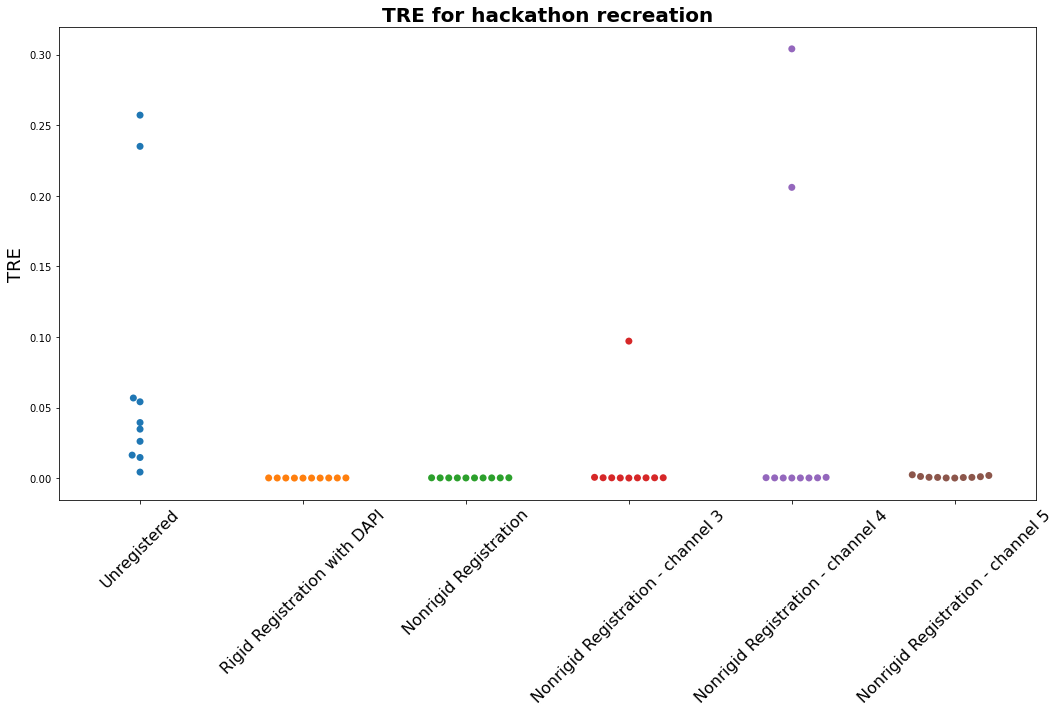

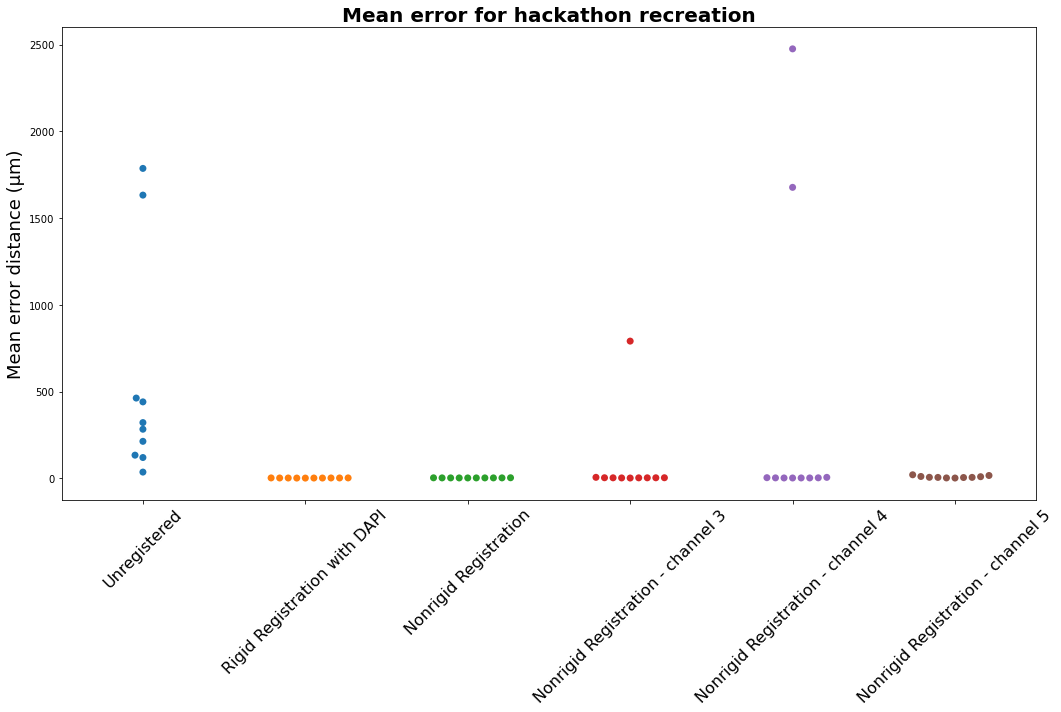

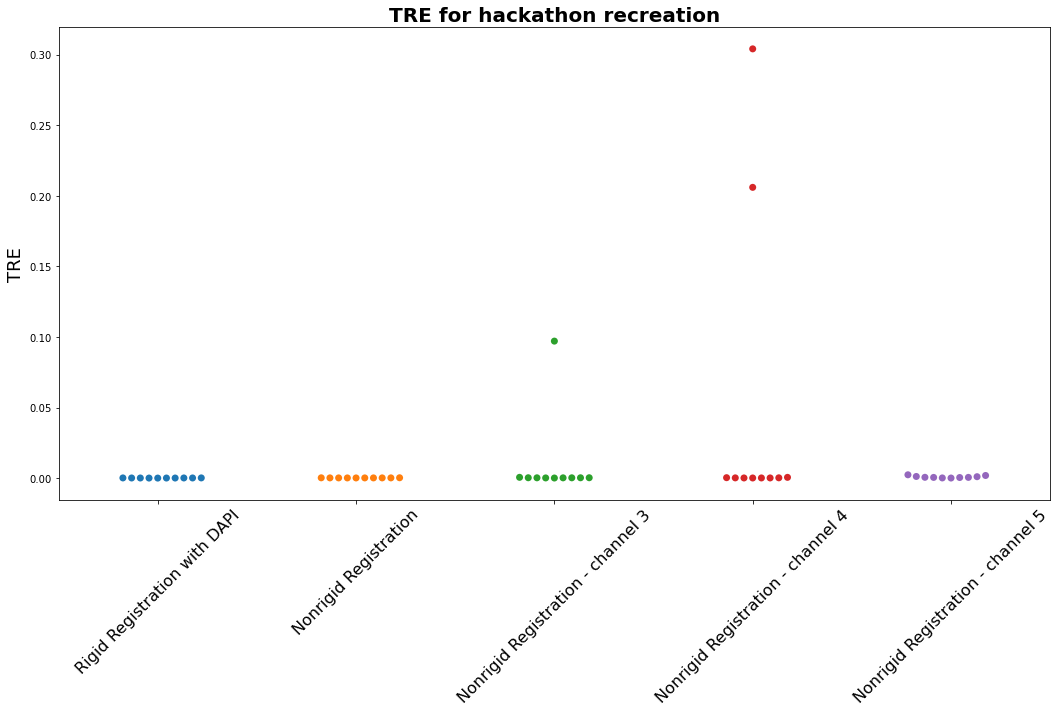

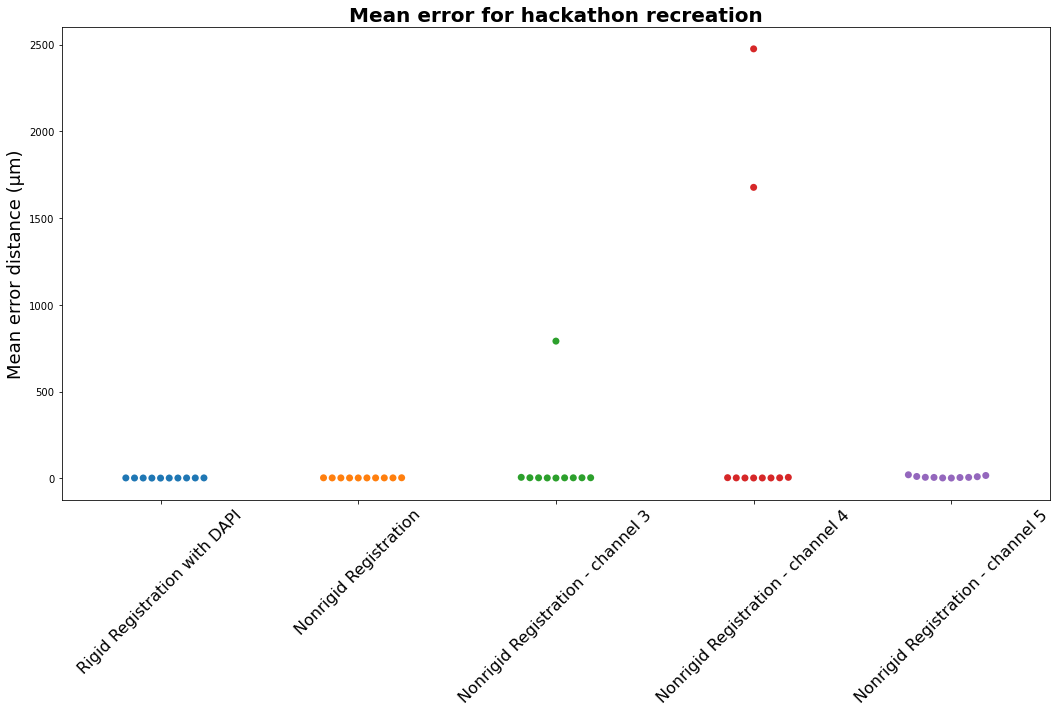

In [12]:
# concatenate all the files needed
df = concat([
    read_csv('../Data_Files/BRCA_hackathon_recreation_rigid_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_noreg_results.csv'),
    read_csv('../Data_Files/BRCA_hackathon_recreation_nonrigid_results.csv'),
    read_csv('../Data_Files/BRCA_nonrigid_ch3_results.csv'),
    read_csv('../Data_Files/BRCA_nonrigid_ch4_results.csv'),
    read_csv('../Data_Files/BRCA_nonrigid_ch5_results.csv')
], ignore_index=True)

order = ['Unregistered', 'Rigid Registration with DAPI', 'Nonrigid Registration', 'Nonrigid Registration - channel 3',
         'Nonrigid Registration - channel 4', 'Nonrigid Registration - channel 5']
viz.pretty_swarm_plot(df, save_path='../Figures/BRCA_nonrigid_channels', hue=None, order=order, figsize=(15, 10))

order = ['Rigid Registration with DAPI', 'Nonrigid Registration', 'Nonrigid Registration - channel 3',
         'Nonrigid Registration - channel 4', 'Nonrigid Registration - channel 5']
viz.pretty_swarm_plot(df, save_path='../Figures/BRCA_nonrigid_channels_regOnly', hue=None, order=order, figsize=(15, 10))